In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from pandas.plotting import scatter_matrix
from math import sqrt
import matplotlib.pyplot as plt
import io
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pandas.plotting import scatter_matrix
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import pickle as pk
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# merging three csv files
df = pd.concat(
    map(pd.read_csv, ['/content/benign-log_radio_status.csv', '/content/jamming-log_radio_status.csv','/content/spoofing-hackrf-log_radio_status.csv']), ignore_index=True)
print(df)
col_name_list = list(df.columns)
print("col_name_list = ", col_name_list)
size_col_name_list = len(col_name_list)
print("size_col_name_list = ", size_col_name_list)

     timestamp  rssi  remote_rssi  txbuf  noise  remote_noise  attack
0    614850759   198          198    100     33            40       0
1    615898770   197          197     93     46            48       0
2    616815893   195          195     96     28            38       0
3    617852800   192          197    100     30            39       0
4    618908331   182          176     97     20            41       0
..         ...   ...          ...    ...    ...           ...     ...
603  390804770   178          180     97     33            37       1
604  391840769   180          174    100     28            38       1
605  392894761   168          171     96     32            37       1
606  393812813   172          169     96     29            47       1
607  394842769   172          171     97     26            34       1

[608 rows x 7 columns]
col_name_list =  ['timestamp', 'rssi', 'remote_rssi', 'txbuf', 'noise', 'remote_noise', 'attack']
size_col_name_list =  7


In [ ]:
#Get a count of number of attack
df['attack'].value_counts()

1    361
0    247
Name: attack, dtype: int64



*   **TimeStamp**
*   **rssi= Recieve Signal Indicator**


*   **remote_rssi= Remote Recieve Signal Indicator**
*   **txbuf= Transmit Buffer**


*   **noise= Noise in radio communication**
*   **remote_noise= Remote noise in radio communication**










Correlation matrix: 
              timestamp      rssi  remote_rssi     txbuf     noise  \
timestamp      1.000000  0.180377     0.204996  0.167311 -0.289775   
rssi           0.180377  1.000000     0.815574  0.102329 -0.003089   
remote_rssi    0.204996  0.815574     1.000000  0.097279 -0.038212   
txbuf          0.167311  0.102329     0.097279  1.000000 -0.114372   
noise         -0.289775 -0.003089    -0.038212 -0.114372  1.000000   
remote_noise   0.255716 -0.111761    -0.013549 -0.016489 -0.078400   
attack        -0.908238 -0.082411    -0.162253 -0.140554  0.282137   

              remote_noise    attack  
timestamp         0.255716 -0.908238  
rssi             -0.111761 -0.082411  
remote_rssi      -0.013549 -0.162253  
txbuf            -0.016489 -0.140554  
noise            -0.078400  0.282137  
remote_noise      1.000000 -0.379081  
attack           -0.379081  1.000000  
Correlation matrix visualization: 


<Axes: >

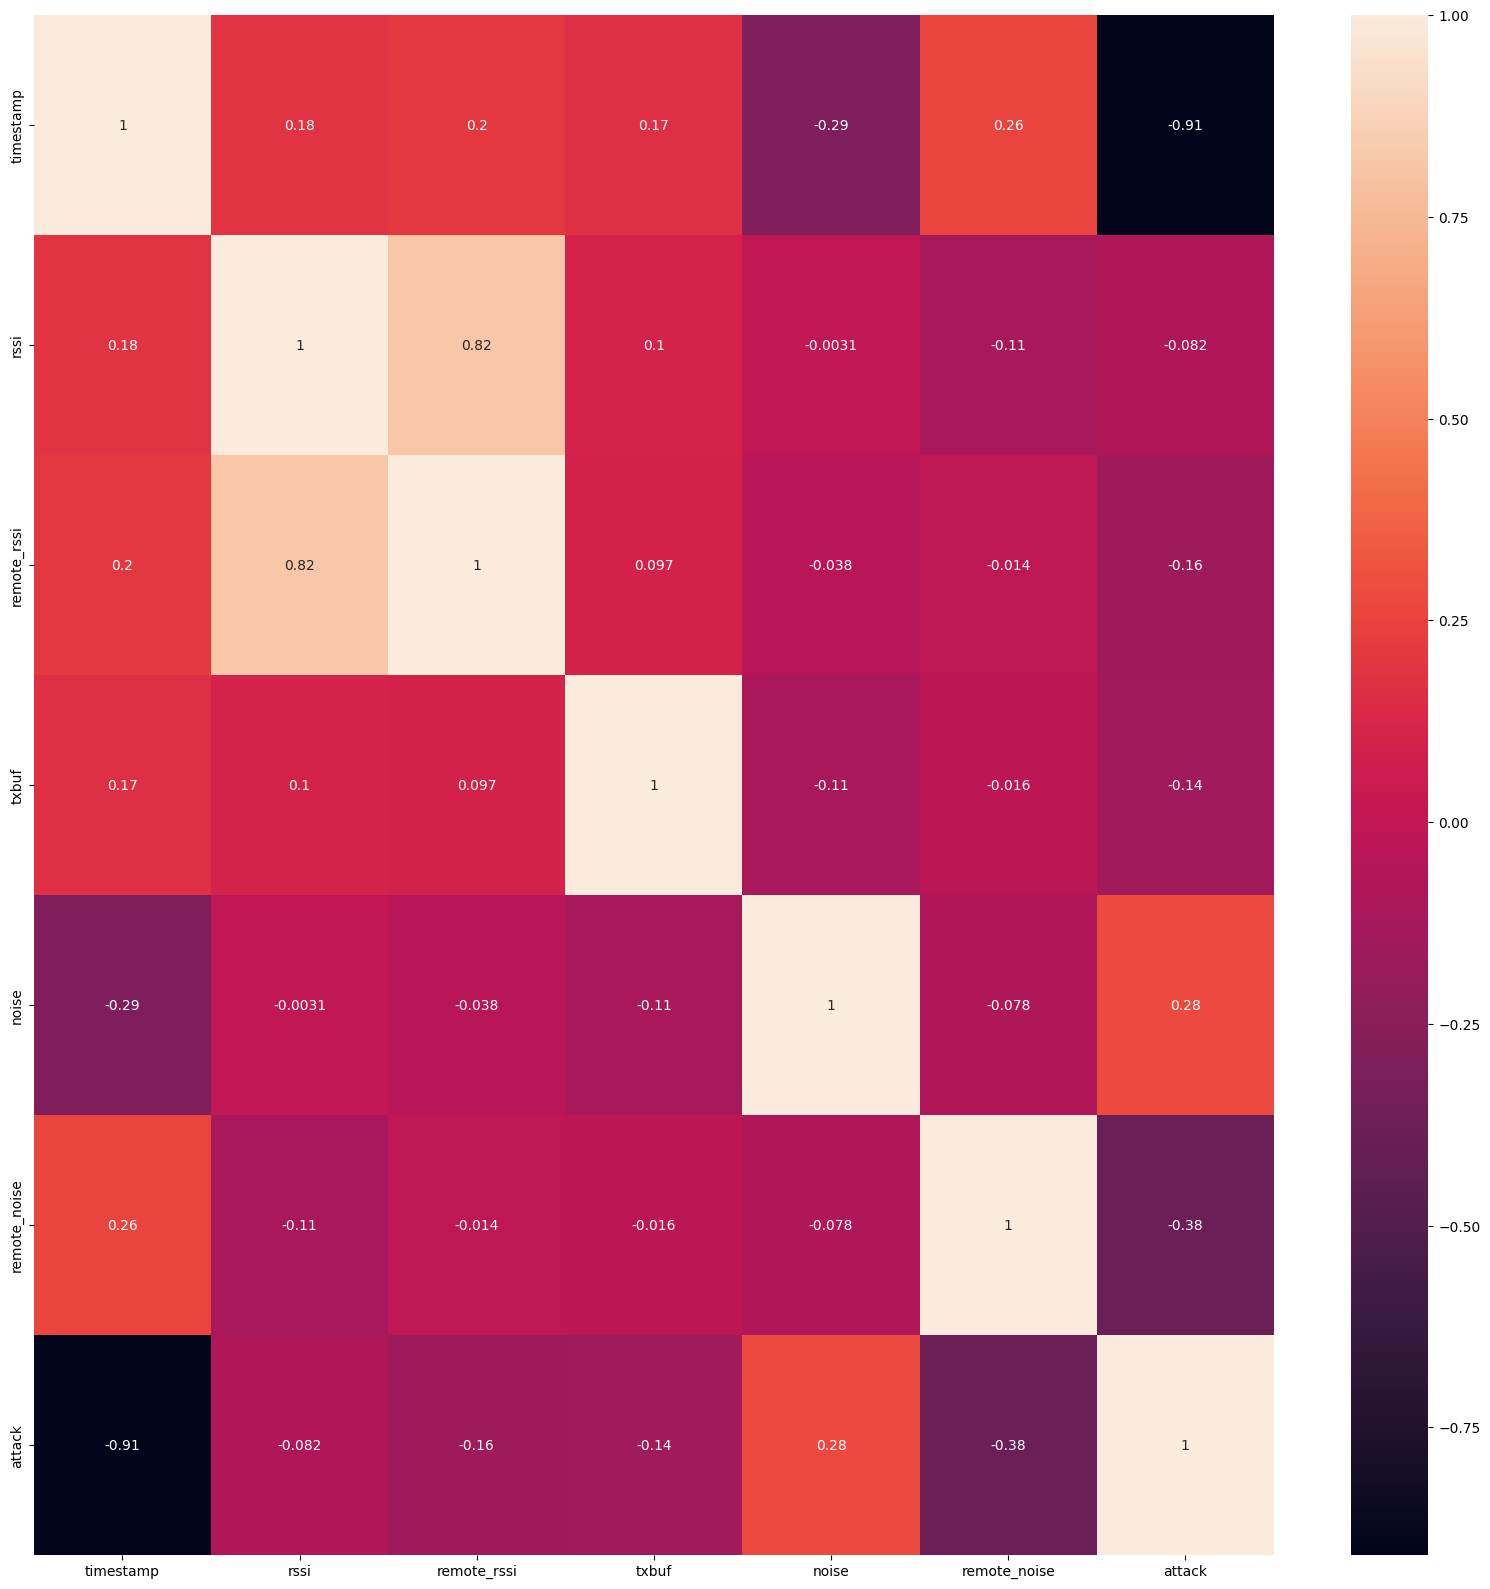

In [ ]:
#Exploratory Data Analysis (EDA)

#correlation matrix heatmap for the data set
f, ax = plt.subplots(figsize=(20, 20))
corr_var = df.corr()
print("Correlation matrix: ")
print(corr_var)

print("Correlation matrix visualization: ")
sns.heatmap(corr_var, annot = True)

Pair plot analysis: 
Histogram analysis: 


array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'rssi'}>,
        <Axes: title={'center': 'remote_rssi'}>,
        <Axes: title={'center': 'txbuf'}>],
       [<Axes: title={'center': 'noise'}>,
        <Axes: title={'center': 'remote_noise'}>,
        <Axes: title={'center': 'attack'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

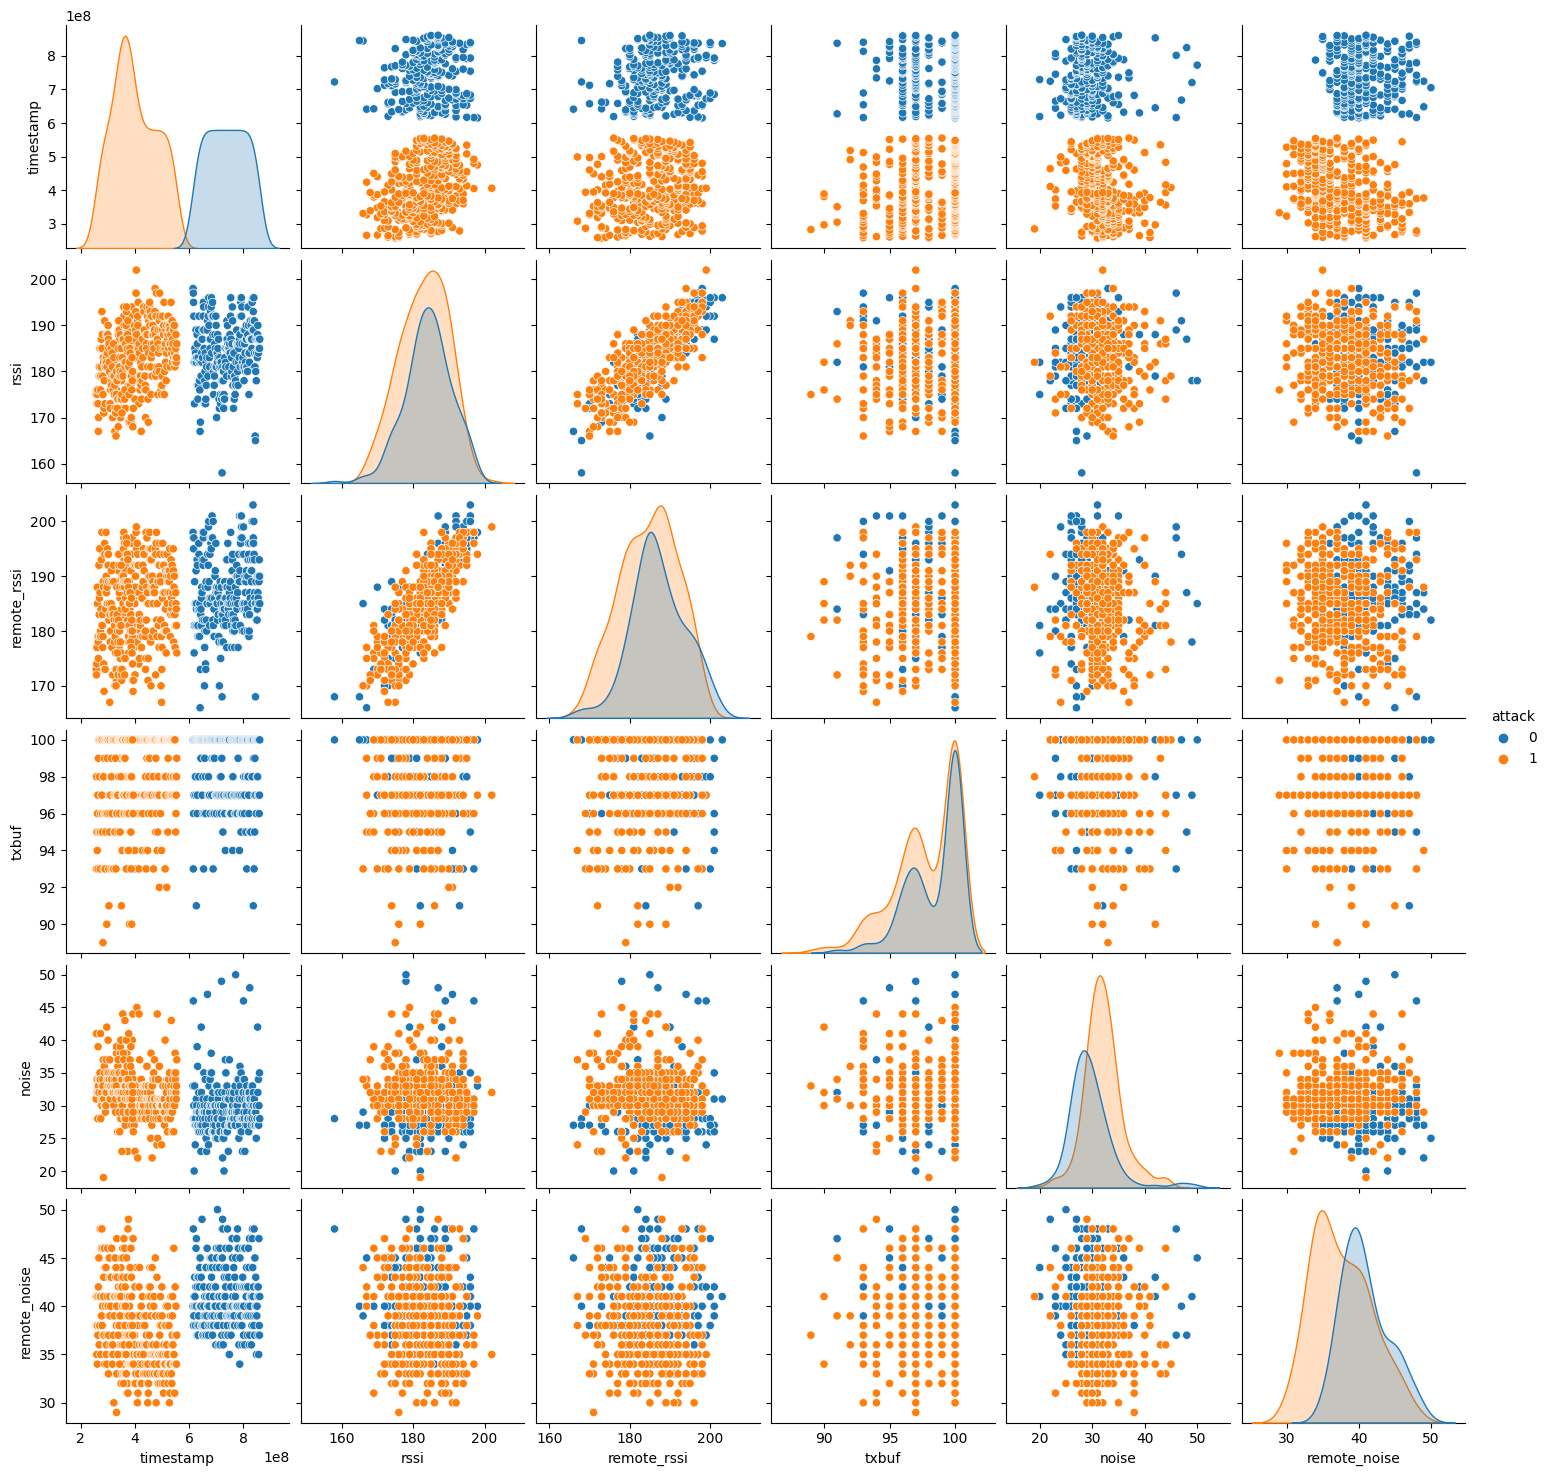

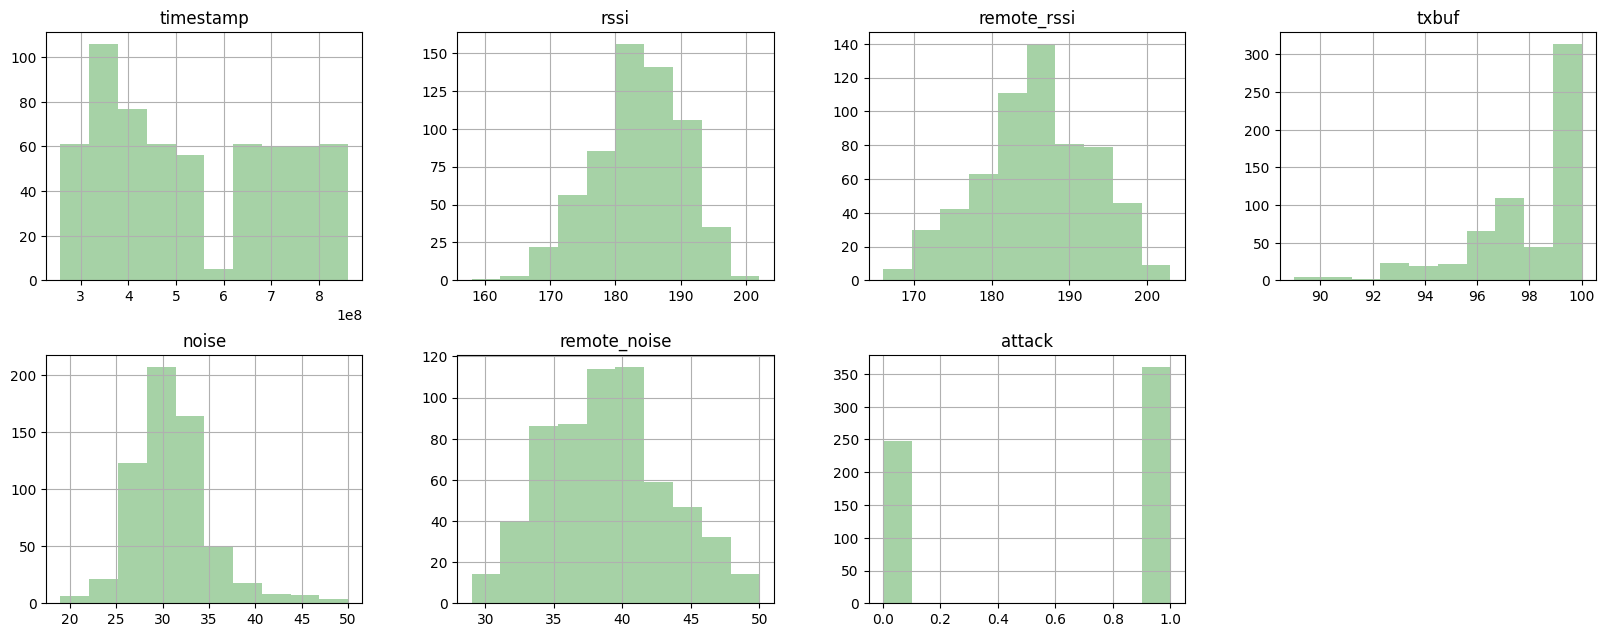

In [ ]:
#pairplot
print("Pair plot analysis: ")
sns.pairplot(df, hue="attack")
#histogram
print("Histogram analysis: ")
df.hist(figsize= (20,20),layout=(5,4), color="green", alpha = 0.35)

Scatter matrix analysis: 


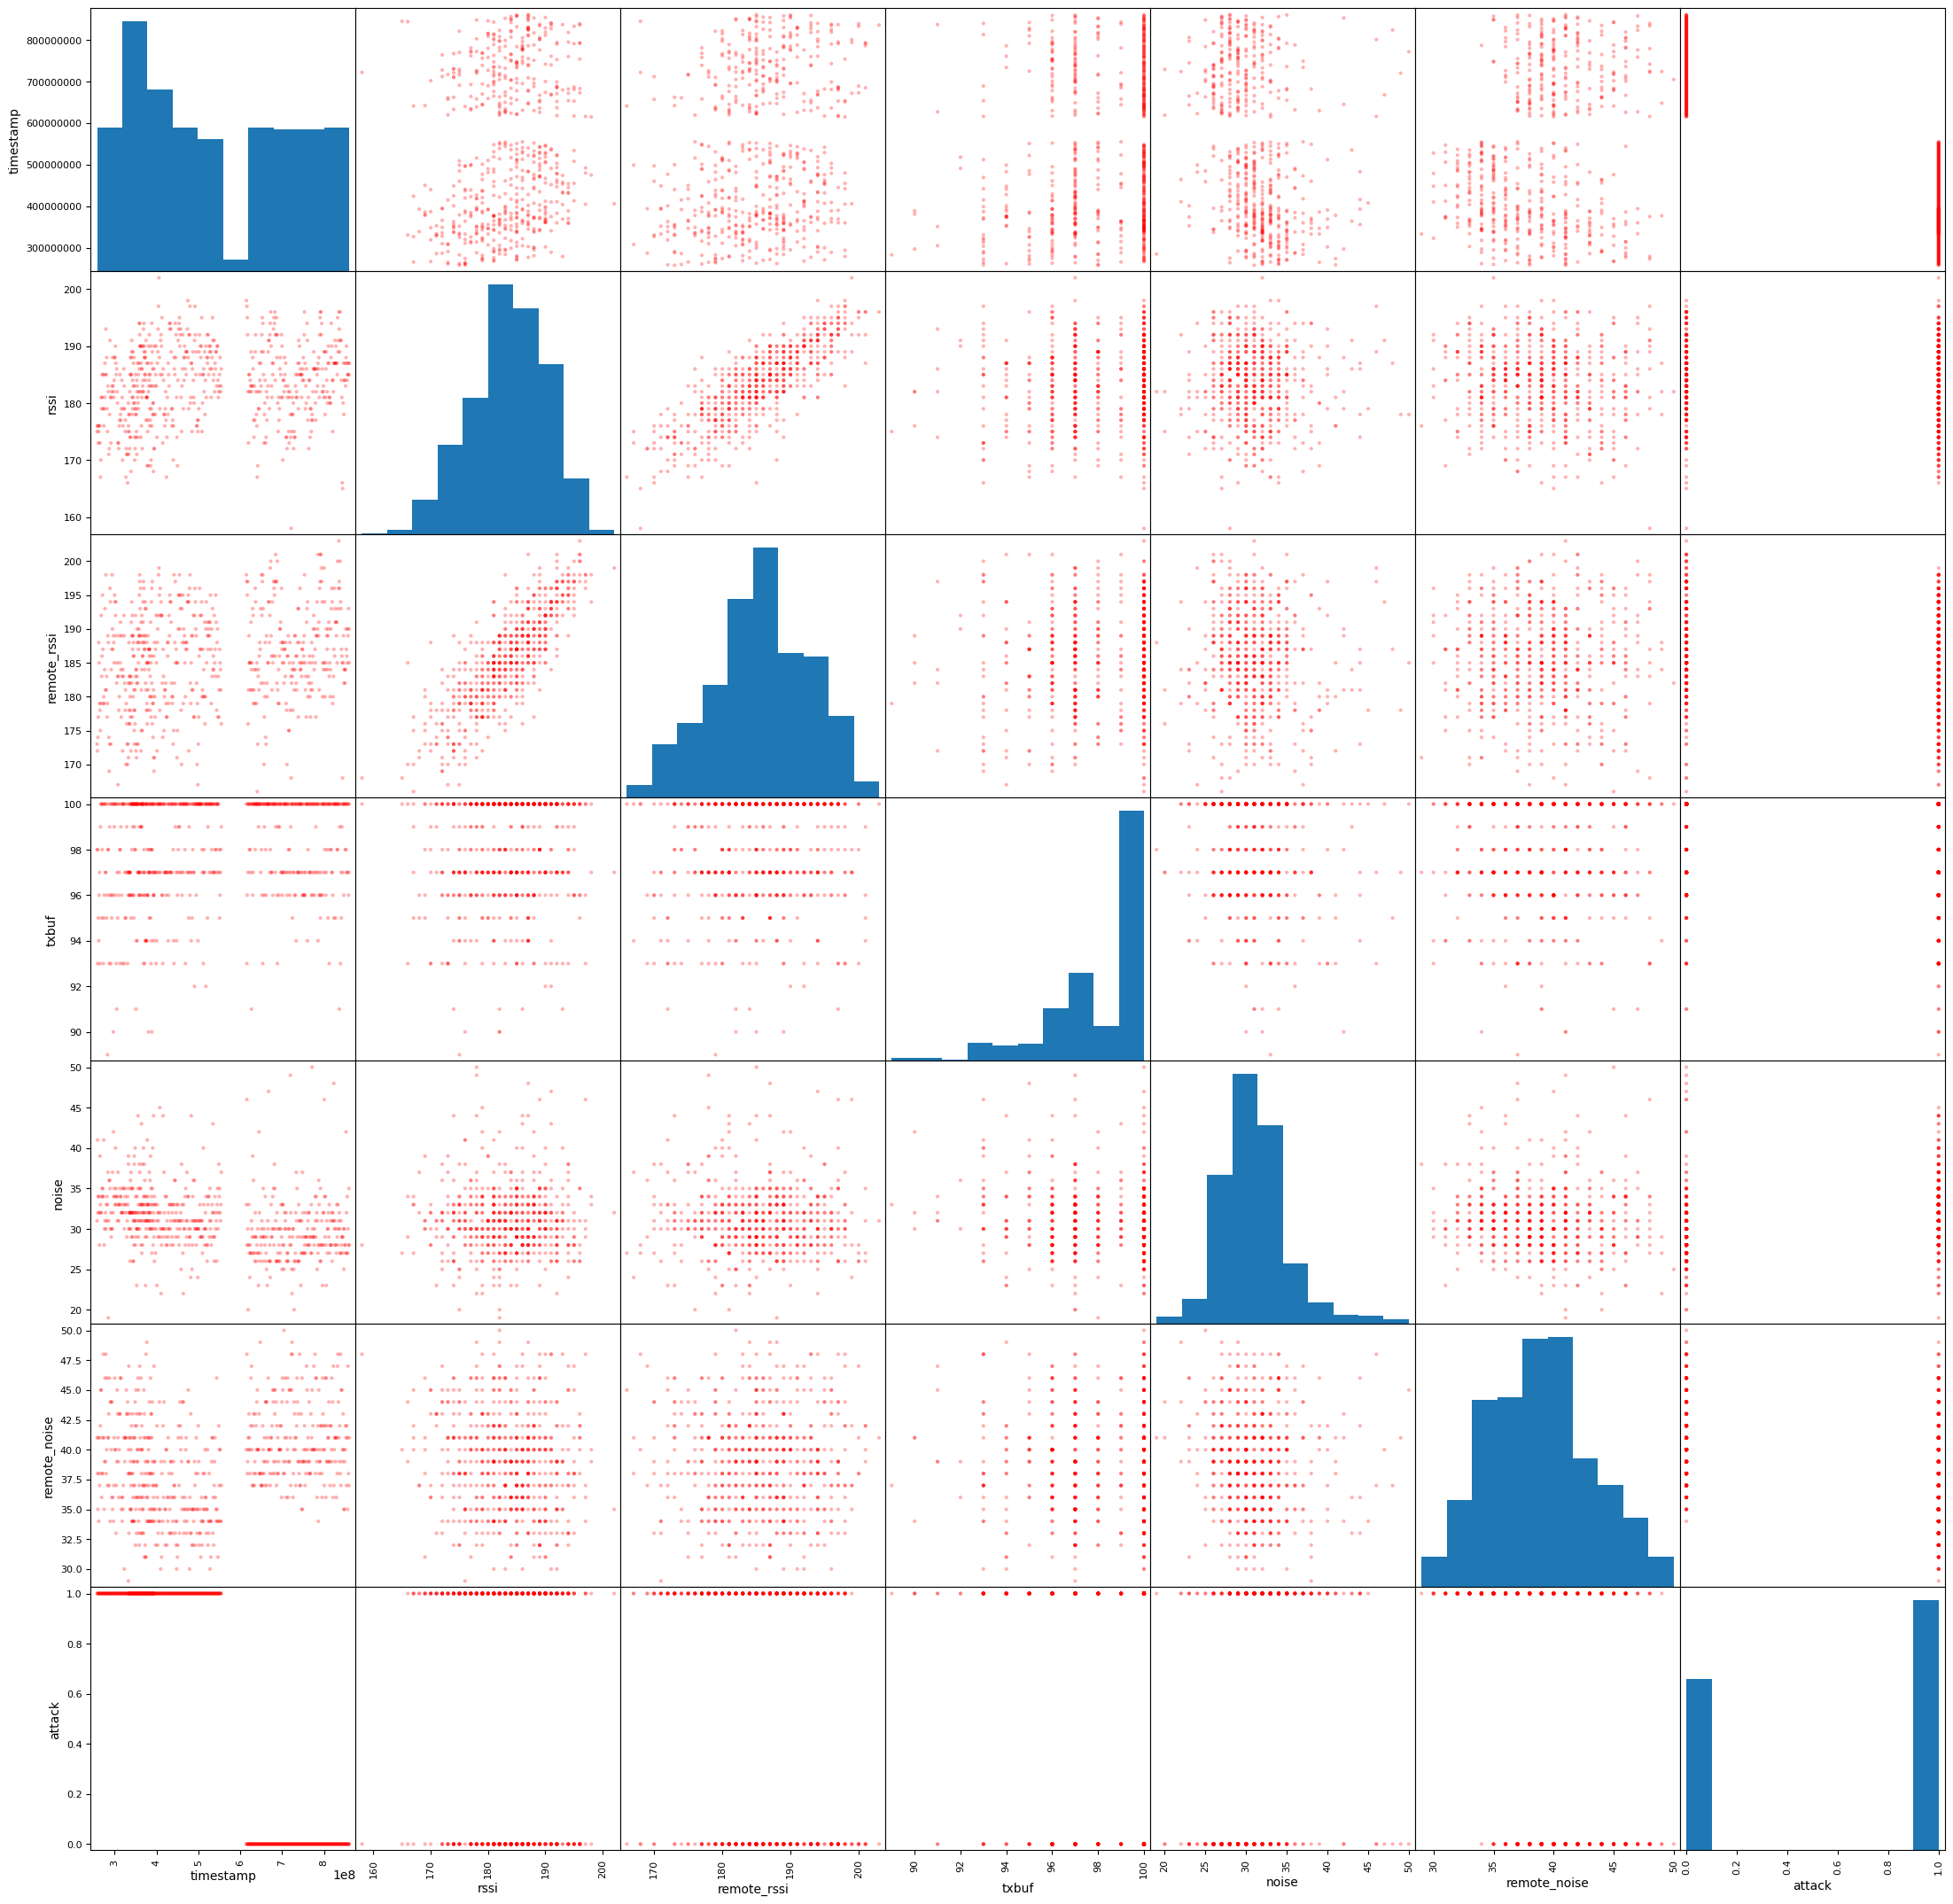

In [ ]:
print("Scatter matrix analysis: ")
scatter_matrix(df, figsize= (27,27), color="red", alpha =0.3)
plt.show()

Individual numerical features analysis with attack


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


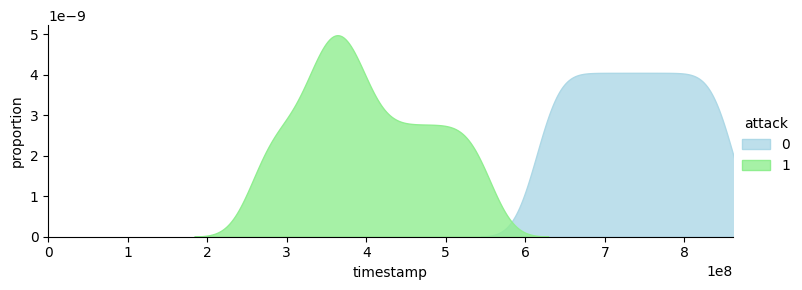

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


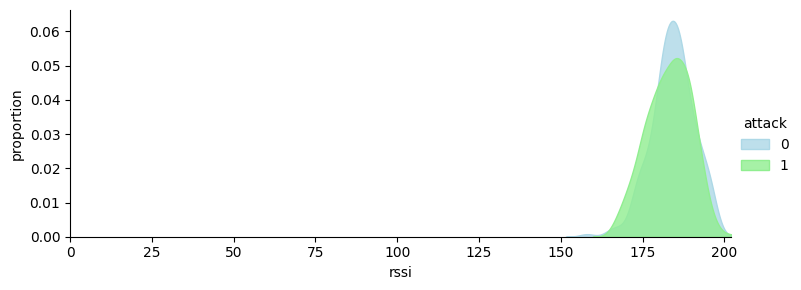

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


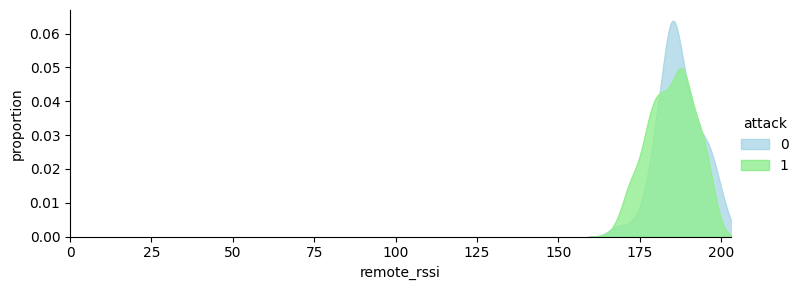

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


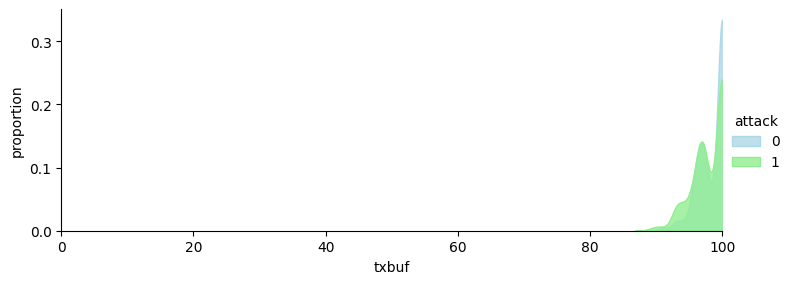

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


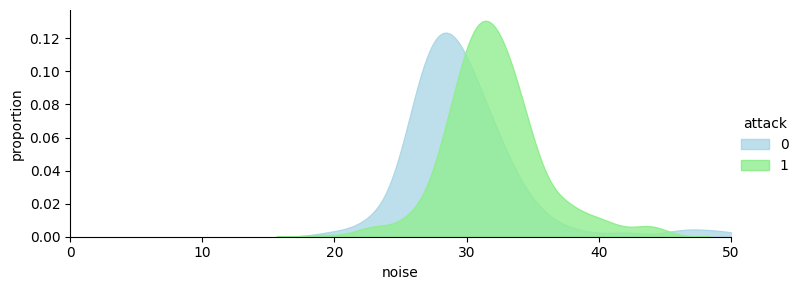

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


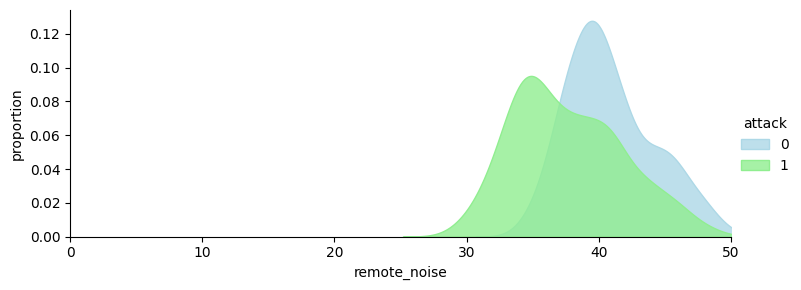

In [ ]:
#Numerical features analysis
def plot_dis_number (ds_list):
    g = sns.FacetGrid(df, hue = "attack", aspect = 2.5, palette={1:"lightgreen", 0:"lightblue"})
    g = g.map(sns.kdeplot,ds_list, shade = True, alpha = 0.8 )
    g.set(xlim = (0, df[ds_list].max()))
    g.add_legend()
    g.set_axis_labels(ds_list, "proportion")
    plt.show()
print("Individual numerical features analysis with attack")
plot_dis_number("timestamp")
plot_dis_number("rssi")
plot_dis_number("remote_rssi")
plot_dis_number("txbuf")
plot_dis_number("noise")
plot_dis_number("remote_noise")

In [ ]:
X = df.drop(labels = ["attack"],axis = 1)
Y = df["attack"].values
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

mean_vec = np.mean(X_train_std, axis=0)
cov_mat = (X_train_std - mean_vec).T.dot((X_train_std - mean_vec)) / (X_train_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

#Best parameter search for 4 models
models = [('knn', KNN),
          ('logistic', LogisticRegression),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 12)
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]


grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    grid.fit(X_train, y_train)
    s = grid.best_params_
    print("Score ", grid.best_score_)
    print(s)
    grids[name] = grid
    print(grids[name])

Covariance matrix 
[[ 1.00206186  0.19374619  0.20754051  0.1940466  -0.28887546  0.2709561 ]
 [ 0.19374619  1.00206186  0.80637392  0.13507252  0.00770633 -0.10719084]
 [ 0.20754051  0.80637392  1.00206186  0.10564028 -0.04190114 -0.0304717 ]
 [ 0.1940466   0.13507252  0.10564028  1.00206186 -0.13032202 -0.00842222]
 [-0.28887546  0.00770633 -0.04190114 -0.13032202  1.00206186 -0.06950105]
 [ 0.2709561  -0.10719084 -0.0304717  -0.00842222 -0.06950105  1.00206186]]

Eigenvalues 
[1.97480744 1.41990861 0.18962428 0.58130288 0.99911502 0.84761291]
Score  1.0
{'n_neighbors': 1}
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 12)})



60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

One or more of the test scores are n

Score  0.395055754260467
{'C': 0.001, 'penalty': 'l2'}
GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 6.57933225e-03, 4.32876128e-02, 2.84803587e-01,
       1.87381742e+00, 1.23284674e+01, 8.11130831e+01, 5.33669923e+02,
       3.51119173e+03, 2.31012970e+04, 1.51991108e+05, 1.00000000e+06]),
                         'penalty': ['l1', 'l2']})
Score  1.0
{'max_depth': 1, 'min_samples_leaf': 3}
GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [3, 6, 10]})
Score  1.0
{'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 100}
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [3, 6, 10],
                         'n_estimators': [50, 100, 200]})


**USING** **KNN**

[[55  0]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        67

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

1.0


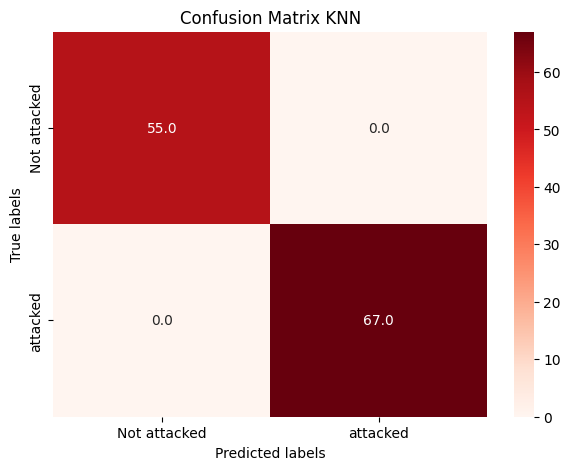

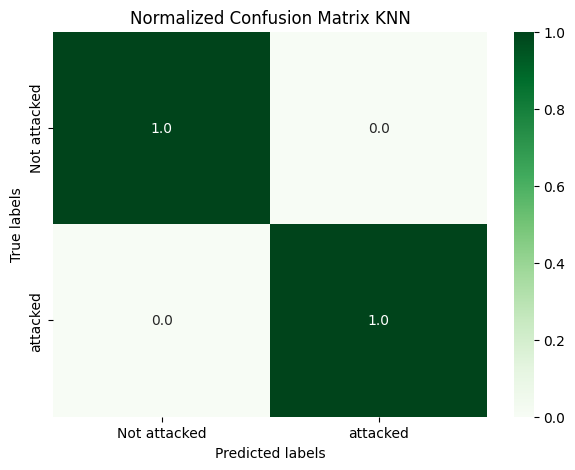

In [ ]:
#KNN model
knn = KNeighborsClassifier()
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# scalarizing X_train and X_test
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

#fit the grid
grid.fit(X_train, y_train)


knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=79, weights='uniform')
knn.fit(X_train, y_train)


# #Model Evaluation
y_pred_knn=knn.predict(X_test)
cm_knn=confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print(classification_report(y_test, y_pred_knn))

knn_precision, knn_recall, _ = precision_recall_curve(y_test, y_pred_knn)

y_pred_knn=knn.predict(X_test)
y_score_knn = knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn,_ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(roc_auc_knn)

labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Reds",annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix KNN');


cm_knn_nor = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Normalized Confusion Matrix KNN');

**USING LOGISTIC REGRESSION**

[[55  0]
 [67  0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        55
           1       0.00      0.00      0.00        67

    accuracy                           0.45       122
   macro avg       0.23      0.50      0.31       122
weighted avg       0.20      0.45      0.28       122

1.0


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


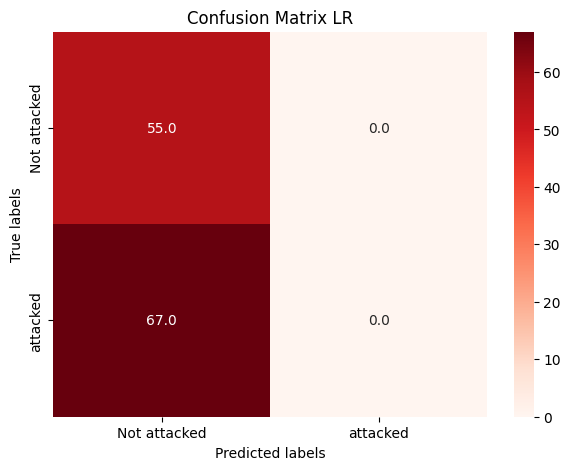

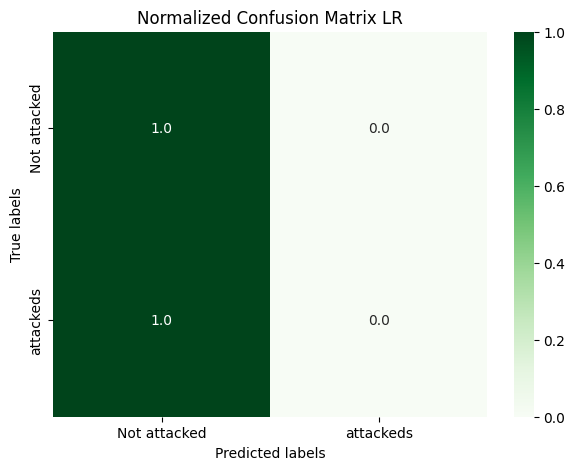

In [ ]:
#Logistic Regression Model
best_lr = LogisticRegression(C=0.8)
best_lr.fit(X_train, y_train)
y_pred_log = best_lr.predict(X_test)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix_log)
print(classification_report(y_test, y_pred_log))

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_log)

y_pred_log=best_lr.predict(X_test)
y_score_log = best_lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr,_ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_lr, tpr_lr)
print(roc_auc_log)


labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_log,cmap="Reds",annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix LR');


confusion_matrix_log_nor = confusion_matrix_log.astype('float') / confusion_matrix_log.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attackeds']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_log_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Normalized Confusion Matrix LR');

**USING RANDOM FOREST CLASSIFIER**

[[55  0]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        67

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

1.0


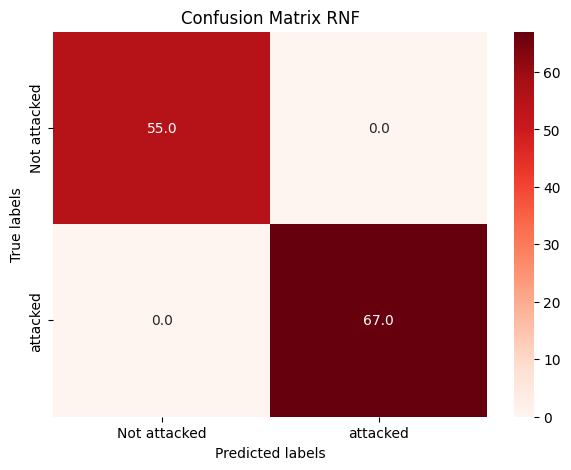

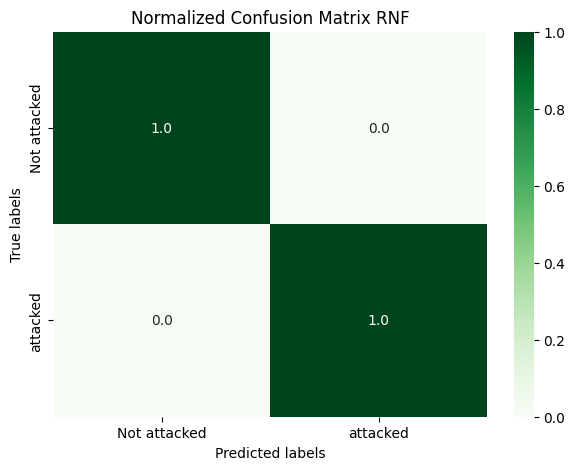

In [ ]:
#Random forests
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [0.5, 0.7, 0.9, 1.0],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc=RandomForestClassifier(random_state=42)
rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc.fit(X_train, y_train)
rfc_best=RandomForestClassifier(random_state=42, max_features=8, n_estimators= 50, max_depth=8, criterion='gini')
rfc_best.fit(X_train, y_train)
y_pred_rfc=rfc_best.predict(X_test)

confusion_matrix_forest = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix_forest)
print(classification_report(y_test, y_pred_rfc))

rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rfc)

# Model Evaluation
y_pred_rfc=rfc_best.predict(X_test)
y_score_rfc = rfc_best.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf,_ = roc_curve(y_test, y_score_rfc)
roc_auc_forests = auc(fpr_rf, tpr_rf)
print(roc_auc_forests)

labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Reds",annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix RNF');


confusion_matrix_forest_nor = confusion_matrix_forest.astype('float') / confusion_matrix_forest.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Normalized Confusion Matrix RNF');

USING DECISION TREE CLASSIFIER

1.0
{'max_depth': 1, 'min_samples_leaf': 3}
DecisionTreeClassifier(max_depth=1, min_samples_leaf=3)
[[55  0]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        67

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

1.0


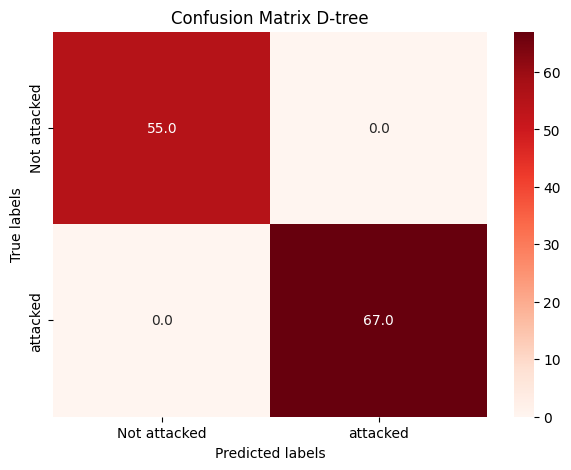

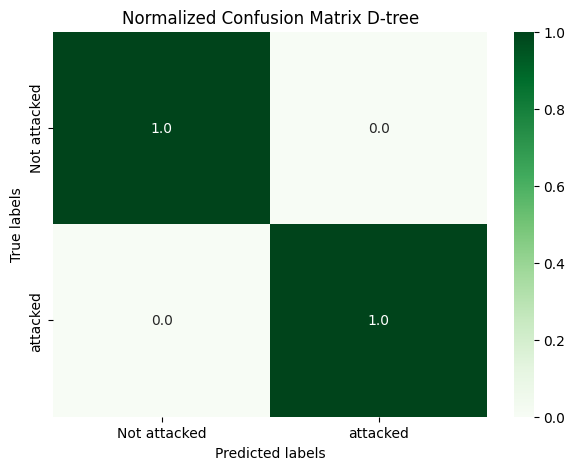

In [ ]:
#Decision Tree Classifier Model
param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [3, 6, 10]}
dtree_model=DecisionTreeClassifier()
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
dtree_model_final= dtree_gscv.fit(X_train, y_train)

print(dtree_model_final.best_score_)
print(dtree_model_final.best_params_)
print(dtree_model_final.best_estimator_)

y_pred_tree = dtree_model_final.predict(X_test)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_tree)
print(classification_report(y_test, y_pred_tree))

dt_precision, dt_recall, _ = precision_recall_curve(y_test, y_pred_tree)

y_score_tree = dtree_model_final.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt,_ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_dt, tpr_dt)
print(roc_auc_tree)


labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_tree,cmap="Reds",annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix D-tree');


confusion_matrix_tree_nor = confusion_matrix_tree.astype('float') / confusion_matrix_tree.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_tree_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Normalized Confusion Matrix D-tree');

USING LSTM MODEL

(486, 6) (486,) (122, 6) (122,)
     timestamp  rssi  remote_rssi  txbuf  noise  remote_noise
324  409868758   191          192     97     32            30
561  348867806   179          181     98     40            42
118  732808778   185          186    100     32            37
295  380886843   190          187    100     32            40
588  375895179   181          185    100     34            37
..         ...   ...          ...    ...    ...           ...
75   689818766   180          181    100     27            41
599  386880821   170          177     93     30            43
575  362853768   174          172    100     33            46
337  422827057   177          179     96     28            40
523  310871838   176          180     97     33            40

[486 rows x 6 columns]
(486, 6) (486,) (122, 6) (122,)
(486, 1, 6) (486,) (122, 1, 6) (122,)
X_train.shape[0]  486
Epoch 1/100
4/4 - 2s - loss: 0.6892 - val_loss: 0.6453 - 2s/epoch - 622ms/step
Epoch 2/100
4/4 - 0s - loss: 

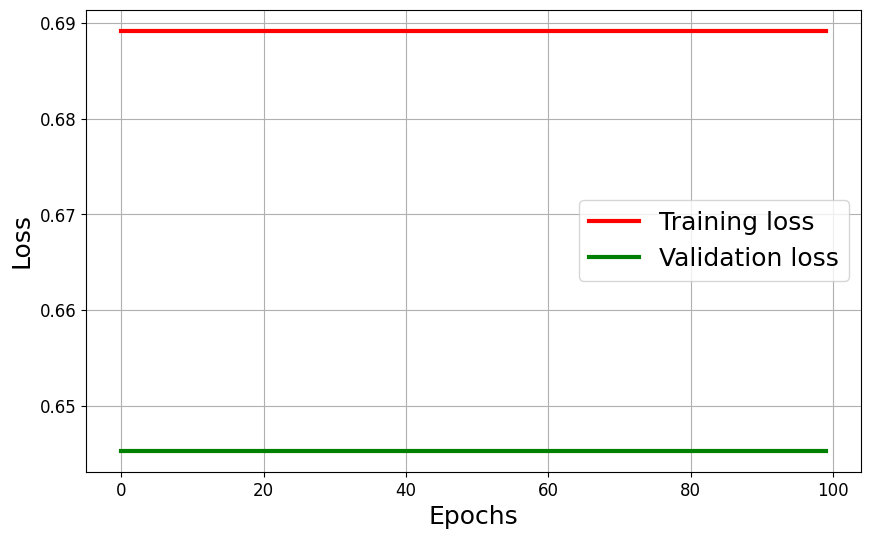

In [ ]:
#Single LSTM Model
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train)

X_train = X_train.values
X_test = X_test.values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# design network
model_lstm = Sequential()
print("X_train.shape[0] ", X_train.shape[0])
# model.add(LSTM(50, input_shape=(X_train.shape[1])))
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1],X_train.shape[2])))
#model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer='adam')
# fit network
history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=155, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2, shuffle=False)

#Output display
training_loss = history.history['loss']
print("Training Loss :", training_loss)

validation_loss = history.history['val_loss']
print("Validation Loss :", validation_loss)




t = np.arange(0, 110, 10)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot( training_loss, color='r',  lw=3.0, label='Training loss')
ax.plot(validation_loss, color='g', lw=3.0, label='Validation loss')
plt.ylabel('Loss', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
plt.legend(loc='best',fontsize = 18)
ax.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('black')
    label.set_fontsize('large')

plt.show()

4/4 [==============================] - 0s 3ms/step
Accuracy LSTM  0.45081967213114754
Test RMSE: 0.741
Confusion Matrix New:
[[55  0]
 [67  0]]


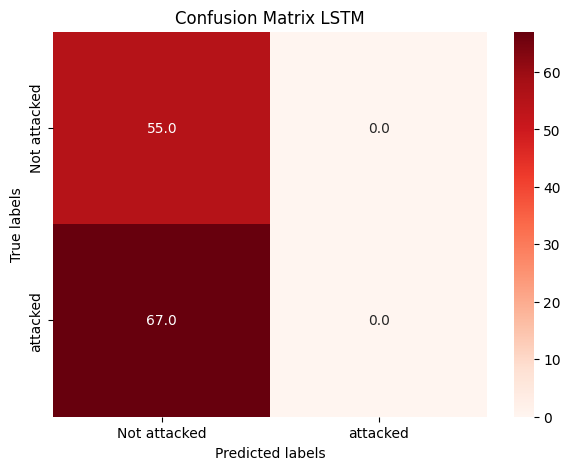

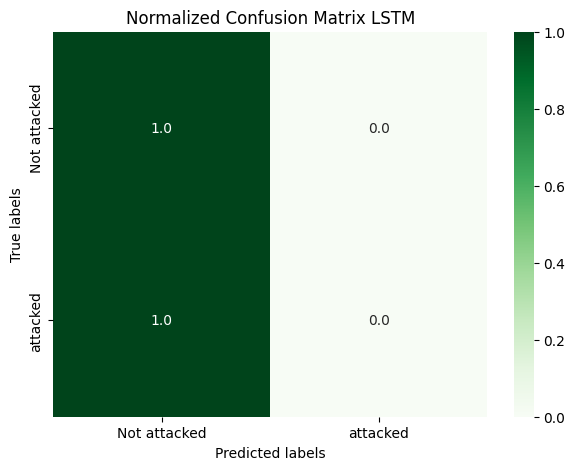

In [ ]:
# LSTM Model Evaluation
yhat = model_lstm.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

final_yhat =yhat
final_yhat_list = []
ii = 0
for yhat_val in final_yhat:
    if yhat_val[0] >= 0.5:
        final_yhat_list.append(1)
    else:
        final_yhat_list.append(0)
    ii+=1



print ("Accuracy LSTM ",metrics.accuracy_score(y_test, final_yhat_list))

# calculate RMSE
rmse_new = sqrt(mean_squared_error(y_test, final_yhat_list))
print('Test RMSE: %.3f' % rmse_new)

confmat = confusion_matrix(y_true=y_test, y_pred=final_yhat_list)
print("Confusion Matrix New:")
print(confmat)

labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confmat,cmap="Reds",annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix LSTM');


confmat_nor = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis]
labels = ['Not attacked', 'attacked']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confmat_nor,cmap="Greens", annot=True,fmt='.1f', ax = ax);
# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Normalized Confusion Matrix LSTM');

**USING SHAP**

In [ ]:
!pip install shap

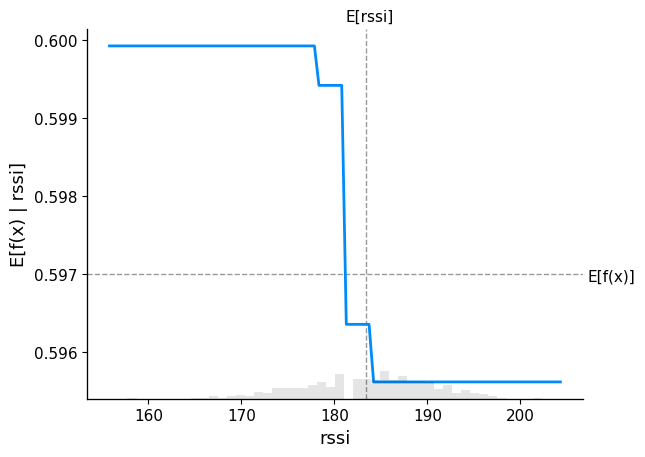

In [ ]:
import shap

select_model = rfc
select_feature = 'rssi'

def feature_proba(x):
   return select_model.predict_proba(x)[:,1]
# Provide Log Odds as Output
def feature_log_odds(x):
   p = select_model.predict_log_proba(x)
   return p[:,1] - p[:,0]

sample_ind = 50
fig,ax = shap.partial_dependence_plot(
select_feature, feature_proba, X, model_expected_value=True,
feature_expected_value=True, show=False, ice=False)

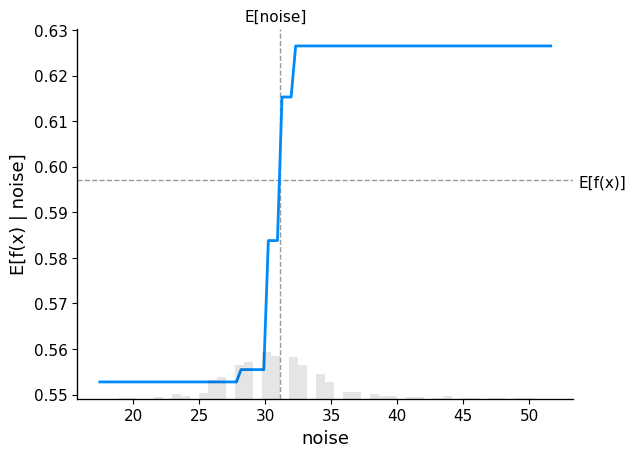

In [ ]:
import shap

select_model = rfc
select_feature = 'noise'

def feature_proba(x):
   return select_model.predict_proba(x)[:,1]
# Provide Log Odds as Output
def feature_log_odds(x):
   p = select_model.predict_log_proba(x)
   return p[:,1] - p[:,0]

sample_ind = 50
fig,ax = shap.partial_dependence_plot(
select_feature, feature_proba, X, model_expected_value=True,
feature_expected_value=True, show=False, ice=False)

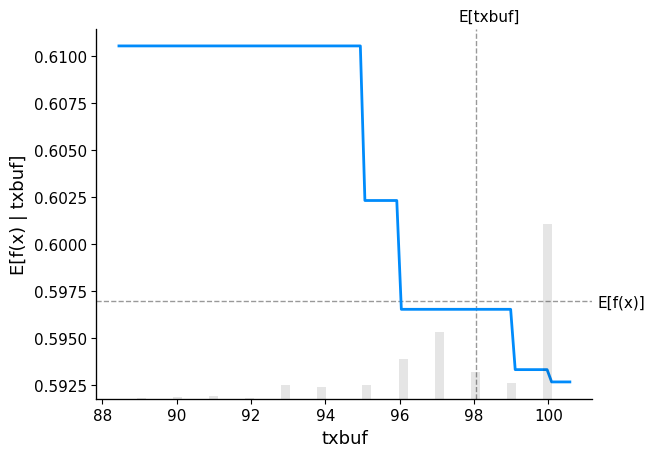

In [ ]:
import shap

select_model = rfc
select_feature = 'txbuf'

def feature_proba(x):
   return select_model.predict_proba(x)[:,1]
# Provide Log Odds as Output
def feature_log_odds(x):
   p = select_model.predict_log_proba(x)
   return p[:,1] - p[:,0]

sample_ind = 50
fig,ax = shap.partial_dependence_plot(
select_feature, feature_proba, X, model_expected_value=True,
feature_expected_value=True, show=False, ice=False)